install numpy-stl

In [ ]:
!pip install numpy-stl



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Quickstart

In [ ]:
from stl import mesh
import math
import numpy

# Create 3 faces of a cube
data = numpy.zeros(6, dtype=mesh.Mesh.dtype)

# Top of the cube
data['vectors'][0] = numpy.array([[0, 1, 1],
                                  [1, 0, 1],
                                  [0, 0, 1]])
data['vectors'][1] = numpy.array([[1, 0, 1],
                                  [0, 1, 1],
                                  [1, 1, 1]])
# Front face
data['vectors'][2] = numpy.array([[1, 0, 0],
                                  [1, 0, 1],
                                  [1, 1, 0]])
data['vectors'][3] = numpy.array([[1, 1, 1],
                                  [1, 0, 1],
                                  [1, 1, 0]])
# Left face
data['vectors'][4] = numpy.array([[0, 0, 0],
                                  [1, 0, 0],
                                  [1, 0, 1]])
data['vectors'][5] = numpy.array([[0, 0, 0],
                                  [0, 0, 1],
                                  [1, 0, 1]])

# Since the cube faces are from 0 to 1 we can move it to the middle by
# substracting .5
data['vectors'] -= .5

# Generate 4 different meshes so we can rotate them later
meshes = [mesh.Mesh(data.copy()) for _ in range(4)]

# Rotate 90 degrees over the Y axis
meshes[0].rotate([0.0, 0.5, 0.0], math.radians(90))

# Translate 2 points over the X axis
meshes[1].x += 2

# Rotate 90 degrees over the X axis
meshes[2].rotate([0.5, 0.0, 0.0], math.radians(90))
# Translate 2 points over the X and Y points
meshes[2].x += 2
meshes[2].y += 2

# Rotate 90 degrees over the X and Y axis
meshes[3].rotate([0.5, 0.0, 0.0], math.radians(90))
meshes[3].rotate([0.0, 0.5, 0.0], math.radians(90))
# Translate 2 points over the Y axis
meshes[3].y += 2


# Optionally render the rotated cube faces
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube faces
for m in meshes:
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate([m.points for m in meshes]).flatten('A')
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

simple example to create a cube using triangles

In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

read image from file and display it

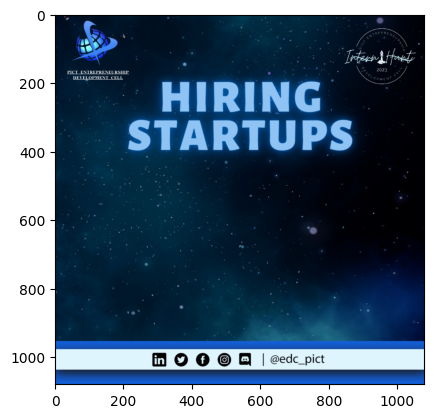

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

with Image.open("/content/kAItchens.png") as im:
  plt.imshow(im)

convert image to grey scale

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

with Image.open("/content/kAItchens.png") as im:
  plt.imshow(im)







  .......................................................................grey_img= Image.open('/content/cliff.jpg').convert('LA')
plt.imshow(grey_img)

SyntaxError: ignored

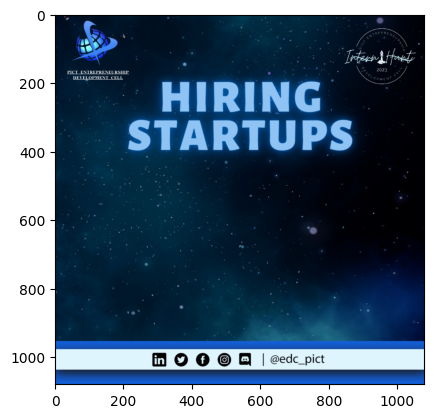

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

with Image.open("/content/kAItchens.png") as im:
  plt.imshow(im)


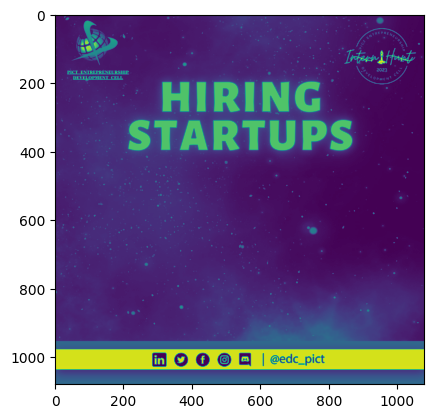

In [ ]:
grey_img= Image.open('/content/kAItchens.png').convert('L')
plt.imshow(grey_img)

create surface

In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    ])
# Define the 12 triangles composing the cube
faces = np.array([\
    [1,2,3],
    [3,1,0],
    ])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('surface.stl')

[[254 253 251 ... 240 241 244]
 [252 248 246 ... 234 236 239]
 [249 245 243 ... 230 233 235]
 ...
 [ 89  70  58 ...  51  54  60]
 [ 69  61  57 ...  58  52  59]
 [ 59  58  59 ...  59  62  70]]
<Mesh: '' 157716 vertices>


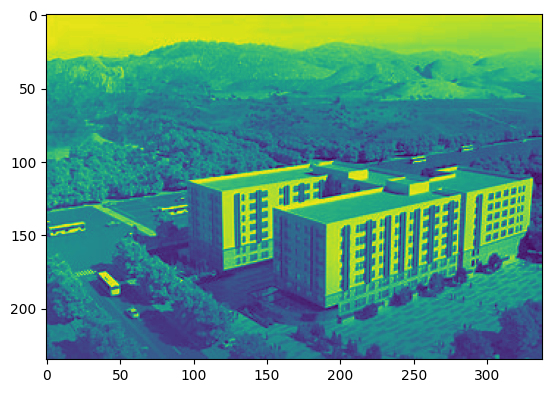

In [ ]:
grey_img= Image.open('/content/i2.jpg').convert('L')
plt.imshow(grey_img)
max_size=(500,500)
max_height=10
min_height=0

#height=0 for minpix
#height=maxheight for maxPixel
#resizes the greyscale image to our mesh size using thumbnail function

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()

print(imageNp)
(ncols,nrows)=grey_img.size


vertices=np.zeros((nrows,ncols,3))

for x in range (0,ncols):
  for y in range(0,nrows):
    pixelIntensity=imageNp[y][x]
    z=(pixelIntensity * max_height )/maxPix
    #print(imageNp[y][x])
    vertices[y][x]=(x,y,z)

faces=[]

for x in range (0,ncols-1):
  for y in range(0,nrows-1):


    #create face1
    vertice1=vertices[y][x]
    vertice2=vertices[y+1][x]
    vertice3=vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])

    #create face2
    vertice1=vertices[y][x]
    vertice2=vertices[y][x+1]
    vertice3=vertices[y+1][x+1]
    face2 = np.array([vertice1,vertice2,vertice3])
    faces.append(face1)
    faces.append(face2)

facesNp=np.array(faces)

# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]

# Write the mesh to file "cube.stl"
surface.save('surface.stl')
print (surface)



[[ 13  10  10 ...   2   2   2]
 [ 14  10  10 ...   2   2   2]
 [ 14  11  10 ...   2   2   2]
 ...
 [110  87  86 ...  86  86  86]
 [111  87  86 ...  86  86  86]
 [112  87  86 ...  86  86  86]]
<Mesh: '' 498002 vertices>


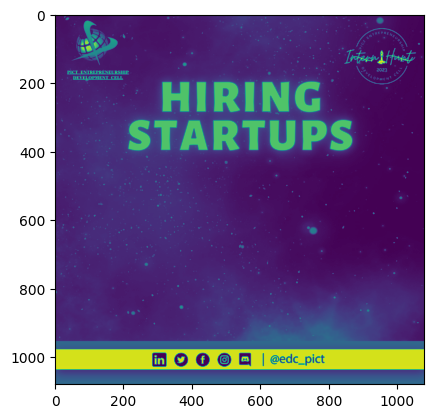

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

with Image.open("/content/kAItchens.png") as im:
  plt.imshow(im)
  grey_img= Image.open('/content/kAItchens.png').convert('L')
plt.imshow(grey_img)

max_size=(500,500)
max_height=10
min_height=0

#height=0 for minpix
#height=maxheight for maxPixel
#resizes the greyscale image to our mesh size using thumbnail function

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()

print(imageNp)
(ncols,nrows)=grey_img.size


vertices=np.zeros((nrows,ncols,3))

for x in range (0,ncols):
  for y in range(0,nrows):
    pixelIntensity=imageNp[y][x]
    z=(pixelIntensity * max_height )/maxPix
    #print(imageNp[y][x])
    vertices[y][x]=(x,y,z)

faces=[]

for x in range (0,ncols-1):
  for y in range(0,nrows-1):


    #create face1
    vertice1=vertices[y][x]
    vertice2=vertices[y+1][x]
    vertice3=vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])

    #create face2
    vertice1=vertices[y][x]
    vertice2=vertices[y][x+1]
    vertice3=vertices[y+1][x+1]
    face2 = np.array([vertice1,vertice2,vertice3])
    faces.append(face1)
    faces.append(face2)

facesNp=np.array(faces)

# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]

# Write the mesh to file "surface.stl"
surface.save('surface.stl')
print (surface)

try 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from stl import mesh


we are dealing with a 3d image . consider z axis
z<x^2+y^2<1.5z
this mask is a ring and these rings grow larger as z grows larger

In [ ]:
x=y=np.linspace(-1,1,100)
z=np.linspace(0,0.5,100)
x2d,y2d= np.meshgrid(x,y, indexing='xy')
x3d,y3d,z3d=np.meshgrid(x,y,z, indexing='xy')

In [ ]:
mask=(x3d**2 +y3d**2 >= z3d) * (x3d**2 +y3d**2 <= 1.5*z3d)